In [23]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
#import dataset
df = pd.read_csv("auto.csv")

#set column header
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [25]:
#Replace ? with NaN

df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [26]:
#---A. HANDLE MISSING VALUE----# 

#Missing value = True

missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
#---1. Identify Missing Value---#

#Count missing values for each column

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
False    204
Name: engine-size, dtype: int64

fuel-system
Fa

In [28]:
#---2. Deal with Missing Data---#

#REPLACE with MEAN VALUE

#Find the mean value of normalized-losses
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

#Replace missing value in normalized-losses with the mean value
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["normalized-losses"].head()

Average of normalized-losses: 122.0


0    122.0
1    122.0
2      164
3      164
4    122.0
Name: normalized-losses, dtype: object

In [29]:
#Do the same thing with bore, stroke, horsepower, & peak-rpm columns

#bore
avg_bore = df["bore"].astype('float').mean(axis=0)
print("Average of bore: ", round(avg_bore, 1))

df["bore"].replace(np.nan, avg_bore, inplace=True)
#df['bore'].head()

#stroke
avg_stroke = df["stroke"].astype('float').mean(axis=0)
print("Average of stroke: ",  round(avg_stroke, 1))

df['stroke'].replace(np.nan, avg_stroke, inplace=True)
#df['stroke'].head()

#horsepower
avg_hp = df["horsepower"].astype('float').mean(axis=0)
print("Average of horse power: ", round(avg_hp, 1))

df["horsepower"].replace(np.nan, avg_hp, inplace=True)
#df['horsepower'].head()

#peak-rpm
avg_peak_rpm = df["peak-rpm"].astype('float').mean(axis=0)
print("Average of peak RPM: ", round(avg_peak_rpm, 1))

df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)
#df['peak-rpm'].head()

#Show the dataframe
df.head(10)

Average of bore:  3.3
Average of stroke:  3.3
Average of horse power:  104.2
Average of peak RPM:  5126.0


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [30]:
#REPLACE MISSING VALUES by THE MOST FREQUENT

#Values in particular column
print(df["num-of-doors"].value_counts())

#Most common type
print('\n', df['num-of-doors'].value_counts().idxmax())

#Replace
df['num-of-doors'].replace(np.nan, "four", inplace=True)

four    114
two      88
Name: num-of-doors, dtype: int64

 four


In [31]:
#DROP WHOLE ROW

#price
df.dropna(subset=['price'], axis=0, inplace=True)

#Reset the index since we droped 2 rows
df.reset_index(drop=True, inplace=True)

In [32]:
#---3. Correct Data Format---#

#List the data types for each attributes
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [33]:
#Convert data types to proper format

#(bore, stroke, price, peak-rpm) : object >>> float
df[['bore','stroke','price','peak-rpm']] = df[['bore','stroke','price','peak-rpm']].astype('float')

#normalized-losses : object >>> int
df['normalized-losses'] = df['normalized-losses'].astype('int')

#Check
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [34]:
#---B. DATA STANDARDIZATION---#

#1. Data Transformation (add new attributes)
#df['city-L/100km'] = 235/df["city-mpg"]
#df.head()

#2. Data Transformation (RENAME Attributes)

#highway
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

#City
df["city-mpg"] = 235/df["city-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,12.368421,9.400000,15250.0


In [35]:
#---C. DATA NORMALIZATION---#
#normalization = transform values into similar range

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.822681,0.909722,0.876254
2,0.848630,0.919444,0.908027
3,0.848630,0.922222,0.908027
4,0.851994,0.920833,0.887960


Text(0.5, 1.0, 'horsepower bins')

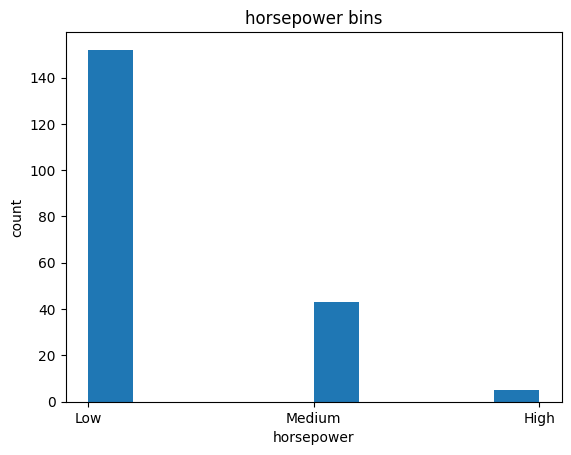

In [52]:
#---D. BINNING---#

#convert data types
#df["horsepower"]=df["horsepower"].astype(int, copy=True)

#Build bin array
#bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
#bins

#set Group Names
#group_names = ['Low', 'Medium', 'High']

#pd.cut to determine each values of horsepower
#df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
#df[['horsepower','horsepower-binned']].head(20)

#vehicles in each bin
#df["horsepower"].value_counts()

#histogram
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [60]:
#---E. Indicator Variable (DUMMY VAR)---#
#Why we use indicator variables?

#We use indicator variables so we can use categorical variables for regression analysis in the later modules.

#Example
#We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.

#We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type.


df.columns

#get variables and assign it to data frame 'dummy_variable_1'

dummy_variable_1 = pd.get_dummies(df['fuel-type'])
#dummy_variable_1.head()

#change the column names
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

#merge df and dummy_variable_1
df = pd.concat([df, dummy_variable_1], axis=1)

#delete original attributes fuel_type from df
df.drop('fuel-type', axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,Low,5000.0,11.190476,8.703704,16500.0,0,1,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,Medium,5000.0,12.368421,9.038462,16500.0,0,1,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,Low,5500.0,9.791667,7.833333,13950.0,0,1,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,Low,5500.0,13.055556,10.681818,17450.0,0,1,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,Low,5500.0,12.368421,9.400000,15250.0,0,1,0,1


In [64]:
#Dummy variable 'aspiration'
#dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
#dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show
#dummy_variable_2.head()

# merge the new dataframe to the original datafram
#df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
#df.drop('aspiration', axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,11.190476,8.703704,16500.0,0,1,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,12.368421,9.038462,16500.0,0,1,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,9.791667,7.833333,13950.0,0,1,0,1,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,13.055556,10.681818,17450.0,0,1,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,12.368421,9.400000,15250.0,0,1,0,1,1,0
